# Tutorial 4: Effective Data Visualization 

### Lecture and Tutorial Learning Goals:

Expand your data visualization knowledge and tool set beyond what we have seen and practiced so far. We will move beyond scatter plots and learn other effective ways to visualize data, as well as some general rules of thumb to follow when creating visualizations. All visualization tasks this week will be applied to real world data sets. Remember, it is an iterative process to answer questions and each step taken should have a good reason behind it.  

After completing this week's lecture and tutorial work, you will be able to:

- Describe when to use the following kinds of visualizations:
    - scatter plots
    - line plots
    - bar plots
    - histogram plots
- Given a dataset and a question, select from the above plot types to create a visualization that best answers the question
- Given a visualization and a question, evaluate the effectiveness of the visualization and suggest improvements to better answer the question
- Identify rules of thumb for creating effective visualizations
- Define the three key aspects of ggplot objects:
    - aesthetic mappings
    - geometric objects
    - scales
- Use the `ggplot2` library in R to create and refine the above visualizations using:
    - geometric objects: `geom_point`, `geom_line`, `geom_histogram`, `geom_bar`, `geom_vline`, `geom_hline`
    - scales: `scale_x_continuous`, `scale_y_continuous`
    - aesthetic mappings: `x`, `y`, `fill`, `colour`, `shape`
    - labelling: `xlab`, `ylab`, `labs`
    - font control and legend positioning: `theme`
    - flipping axes: `coord_flip`
    - subplots: `facet_grid`
- Describe the difference in raster and vector output formats
- Use `ggsave` to save visualizations in `.png` and `.svg` format

Any place you see `...`, you must fill in the function, variable, or data to complete the code. Replace `fail()` with your completed code and run the cell!

In [1]:
### Run this cell before continuing. 

library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
source("tests_tutorial_04.R")
source("cleanup_tutorial_04.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘package:tidyr’:

    matches




**Question 0.1** 
<br> {points: 1}

Match the following definitions with the corresponding aesthetic mapping or function used in R:

*Definitions*

A. Prevents a chart from being stacked. It preserves the vertical position of a plot while adjusting the horizontal position. 

B. In bar charts, this aesthetic fills in the bars by a specific colour or separates the counts by a variable different from the x-axis. 

C. In bar charts, it outlines the bars but in scatterplots, it fills in the points (colouring them based on a particular variable aside from the x/y-axis). 

D. This makes the height of each bar equal to the number of cases in each group, and it is incompatible with mapping values to the y aesthetic. This stat basically allows the y-axis to represent particular values from the data instead of just counts. 

E. This aesthetic allows further visualization of data by varying data points by shape (modifying their shape based on a particular variable aside from the x/y-axis).

F. Labels the y-axis. 


*Aesthetics and Functions*

1. `colour`
2. `dodge`
3. `fill`
4. `identity`
5. `ylab`
6. `shape`

For every description, create an object using the letter associated with the definition and assign it to the corresponding number from the list above. For example: `B <- 1`

In [2]:
# Replace the fail() with your answer. 

# your code here
A <- 2
B <- 3
C <- 1
D <- 4
E <- 6
F <- 5

In [3]:
test_0.1()

[1] "Success!"


**Question 0.2** True or False:
<br> {points: 1}

We should save a plot as an `.svg` file if we want to be able to rescale it without losing quality.

*Assign your answer to an object called `answer0.2`. Make sure your answer is in lowercase letters and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [4]:
# Replace the fail() with your answer.
 
# your code here
answer0.2 <- "true"

In [5]:
test_0.2()

[1] "Success!"


## 1. Data on Personal Medical Costs 

As we saw in the worksheet, data scientists work in all types of organizations and with all kinds of problems. One of these types of organizations are companies in the private sector that work with health data. Today we will be looking at data on personal medical costs. There are varying factors that affect health and consequently medical costs. Our goal for today is to determine how are variables related to the medical costs billed by health insurance companies. 


To analyze this, we will be looking at a dataset that includes the following columns:

* `age`: age of primary beneficiary
* `sex`: insurance contractor gender: female, male
* `bmi`: body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/$m^{2}$) using the ratio of height to weight, ideally 18.5 to 24.9
* `children`: number of children covered by health insurance / number of dependents
* `smoker`: smoking
* `region`: the beneficiary's residential area in the US: northeast, southeast, southwest, northwest.
* `charges`: individual medical costs billed by health insurance

*This dataset, was taken from the [collection of Data Sets](https://github.com/stedy/Machine-Learning-with-R-datasets) created and curated for the [Machine Learning with R](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-r) book by Brett Lantz.*

**Question 1.1** Yes or No: 
<br> {points: 1}

Based on the information given in the cell above, do you think the column `charges` includes quantitative/numerical data? 

*Assign your answer to an object called `answer1.1`. Make sure your answer is written in lowercase and is surrounded by quotation marks (e.g. `"yes"` or `"no"`).*

In [6]:
# Replace the fail() with your answer. 

# your code here
answer1.1 <- "yes"

In [7]:
test_1.1()

[1] "Success!"


**Question 1.2** Multiple Choice:
<br> {points: 1}

Assuming overplotting is not an issue, which plot would be the most effective to compare the relationship of `age` and `charges`?

A. Scatterplot 

B. Stacked Bar Plot 

C. Bar Plot 

D. Histogram 

*Assign your answer to an object called `answer1.2`. Make sure your answer is an uppercase letter and is surrounded by quotation marks (e.g. `"F"`).*

In [8]:
# Replace the fail() with your answer. 

# your code here
answer1.2 <- "A"

In [9]:
test_1.2()

[1] "Success!"


**Question 1.3**
<br> {points: 1}

Read the `insurance.csv` file in the `data/` folder and use `tail` to view the last 6 individuals presented. 

*Assign your answer to an object called `insurance`.*

In [10]:
# your code here
insurance <- read_csv("data/insurance.csv")
tail(insurance) # preview the last 6 rows of the data set

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_character(),
  bmi = col_double(),
  children = col_double(),
  smoker = col_character(),
  region = col_character(),
  charges = col_double()
)



age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
52,female,44.70,3,no,southwest,11411.685
50,male,30.97,3,no,northwest,10600.548
18,female,31.92,0,no,northeast,2205.981
18,female,36.85,0,no,southeast,1629.833
21,female,25.80,0,no,southwest,2007.945
61,female,29.07,0,yes,northwest,29141.360


In [11]:
test_1.3()

[1] "Success!"


**Question 1.4** 
<br> {points: 3}

Looking over the loaded data shown above, what observations can you make about the relationship between medical charges and age? How about medical charges and BMI? Finally, what about medical charges and smoking? 

Also, comment on whether our observations might change if we visualize the data? And/or whether visualizing the data might allow us to more easily make observations about the relationships in the data as opposed to trying to make them directly from the data table?

Answer in the cell below.

By looking at the data above, we can see that there is a positive relationship between the medical charges and age, because the medical charges increases as the age increases. However, there is no clear/direct relationship between the medical charges and BMI, because we can see that there is a 18 female with 36.85 BMI with less medical charges than another person with 31.92 BMI etc. By just looking at these 6 observations, we can say that medical charges increase with smoking, and therefore there is a positive relationship, but it is very limited information.

Our observations might change if we visualize the data, and it will certainly allow us to make observations about the relationships in the data as opposed to trying to make them directly from the data table, because it will give us more information, more data points and help us asses/generalize these relationships.

**Question 1.5**
<br> {points: 1}

According to the National Heart, Lung and Blood Institute of the US: "The higher your BMI, the higher your risk for certain diseases such as heart disease, high blood pressure, type 2 diabetes, gallstones, breathing problems, and certain cancers". 

Based on this information, we can hypothesize that individuals with a higher BMI are likely to have more medical costs. Let's use our data and see if this holds true. Create a scatter plot of `charges` (y-axis) versus `bmi` (x-axis).

In the scaffolding we provide below, we suggest that you set `alpha` to a value between 0.2 and 0.4. `alpha` sets the transparency of points on a scatter plot, and increasing transparencing of points is one tool you can use to deal with over plotting issues.

*Assign your answer to an object called `bmi_plot`. Make sure to label your axes appropriately.*

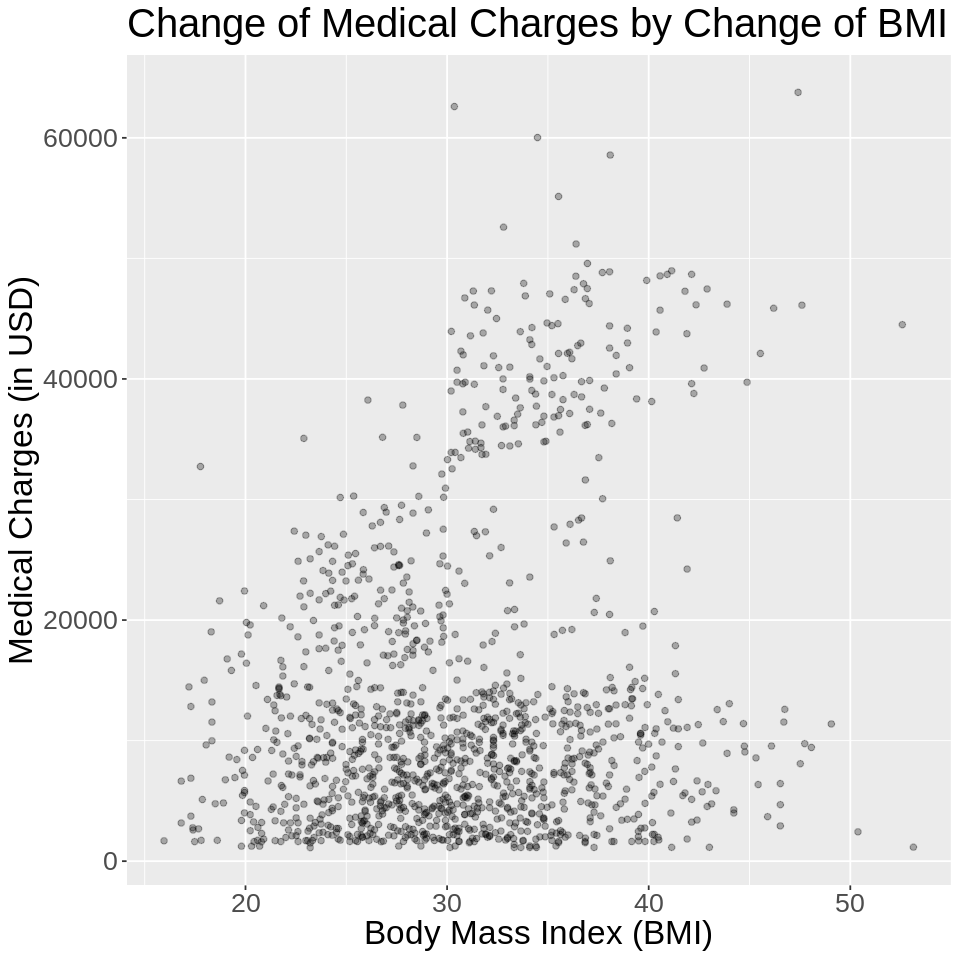

In [12]:
options(repr.plot.width = 8, repr.plot.height = 8) #Remember to set your plot sizes to an appropiate size

#... <- insurance %>%
#    ggplot(aes(x = ..., y =  ...)) + 
#        geom_...(alpha = ...) + # Deals with the transparency of the points, set it to an appropiate value
#        xlab(...) +
#        ylab(...) +
#        ggtitle(...)

# your code here
bmi_plot <- insurance %>%
            ggplot(aes(x = bmi, y =  charges)) + 
            geom_point(alpha = 0.3) + # Deals with the transparency of the points, set it to an appropiate value
            xlab("Body Mass Index (BMI)") +
            ylab("Medical Charges (in USD)") +
            ggtitle("Change of Medical Charges by Change of BMI")+
            theme(text = element_text(size = 20))
bmi_plot

In [13]:
test_1.5()

[1] "Success!"


**Question 1.6**
<br> {points: 3}

Analysis: Comment on the effectiveness of the plot. Take into consideration the rules of thumb discussed in lecture. Also comment on what could be improved for this plot and also what is done correctly. 

Answer in the cell below.

The plot above include some of the rules of thumb such as the human-readable axes with BMI and Medical Charges and a title. We can also see that text and symbols of the plot are big enough to be easily-read. These legends, labels and the use of scatterplot to compare 2 quantitative columns are done correctly. However, the effectiveness of the plot can be improved because we can see that there is some overplotting between the 24-35 BMI and charges less than 10,000 USD. We can use `options` to make the plot fit better to our screen as well. We can also use some color and legends to indicate the age or smoking to see whether the effect of BMI on medical charges is different between different age or smoking groups.        

**Question 1.7**
<br> {points: 3}

Analysis: What do you observe from the scatter plot? Do the data suggest that there might be evidence of a relationship between BMI and medical costs of individuals? 
From this plot alone, can we say higher BMI causes higher medical charges? Why or why not? 

Answer in the cell below. 

We observe that the data points are mainly spread into two regions such that one region where BMI is between 20 & 40 and medical costs are less than 15,000 USD, and one region where BMI is also in the same range and medical charges are between 15,000 & 50,000 USD. The data doesn't suggest any evidence such that there is a relationship between BMI and medical costs of individuals, because the points are spread all across the plot and there is no clear trend/line to represent the change of medical costs by the change of BMI. Therefore, we can't say higher BMI causes higher medical charges as we see individuals with higher BMI paying less than individuals with lower BMI for medical charges. 

**Question 1.8**
<br> {points: 3}

Again, based on information from the National Heart, Lung and Blood Institute of the US, smoking cigarettes is said to be a risk factor for obesity. Create the same plot as you did in **Question 1.5** but this time add the `colour` aesthetic to observe if smoking might affect the body mass of individuals. Also, use `labs` to format your legend title. You may want to pass `alpha = 0.4` to the scatter geometric object to make the scatter points translucent (just for your own ease of visualization; you don't have to and we won't check that when grading).

*Assign your answer to an object called `smoke_plot`. Make sure to label your axes appropriately.*

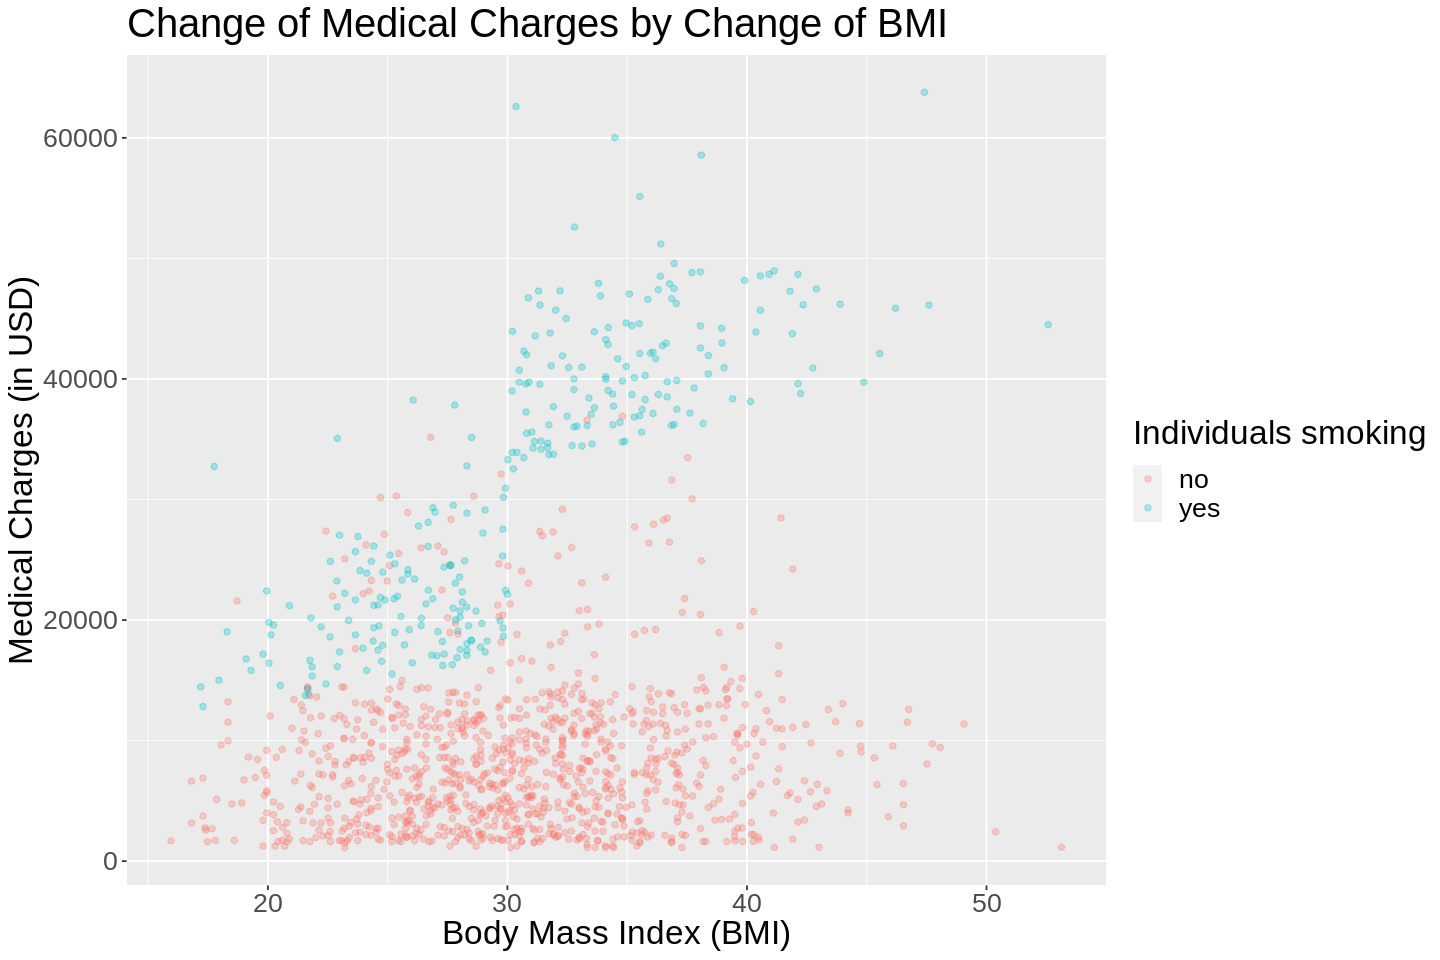

In [14]:
options(repr.plot.width = 12, repr.plot.height = 8) #Remember to set your plot sizes to an appropiate size

# add the code for your plot here!

# your code here
smoke_plot <- insurance %>%
            ggplot(aes(x = bmi, y =  charges, color = smoker)) + 
            geom_point(alpha = 0.3) + # Deals with the transparency of the points, set it to an appropiate value
            xlab("Body Mass Index (BMI)") +
            ylab("Medical Charges (in USD)") +
            labs(color = "Individuals smoking")+
            ggtitle("Change of Medical Charges by Change of BMI")+
            theme(text = element_text(size = 20))
smoke_plot

In [15]:
# Most of the tests for this question are hidden. You have to decide whether you've created a good visualization!
# here's one test to at least ensure you named the plot object correctly:
expect_true(exists("smoke_plot"))


**Question 1.9.0** (Analyzing the Graph) True or False: 
<br> {points: 1}

Smokers generally have a lower BMI than non-smokers. 

*Assign your answer to an object called `answer1.9.0`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [16]:
# Replace the fail() with your answer. 

# your code here
answer1.9.0 <- "false"

In [17]:
test_1.9.0()

[1] "Success!"


**Question 1.9.1** (Analyzing the Graph) True or False: 
<br> {points: 1}

Smokers generally have higher medical charges than non-smokers.

*Assign your answer to an object called `answer1.9.1`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"true"` or `"false"`).*

In [18]:
# Replace the fail() with your answer. 

# your code here
answer1.9.1 <- "true"

In [19]:
test_1.9.1()

[1] "Success!"


**Question 1.10**
<br> {points: 1}

Finally, create a bar graph that displays the proportion of smokers for both females and males in the data set. Use sex as the horizontal axis, and colour the bars to differentiate between smokers / nonsmokers. This could, for example, be used help us determine whether we should consider smoking behaviour when exploring whether there is a relationship between sex and medical costs.

*Assign your answer to an object called `bar_plot`. Make sure to label your axes appropriately.*

>*Note - many historical datasets treated sex as a variable where the possible values are only binary: male or female. This representation in this question reflects how the data were historically collected and is not meant to imply that we believe that sex is binary.*

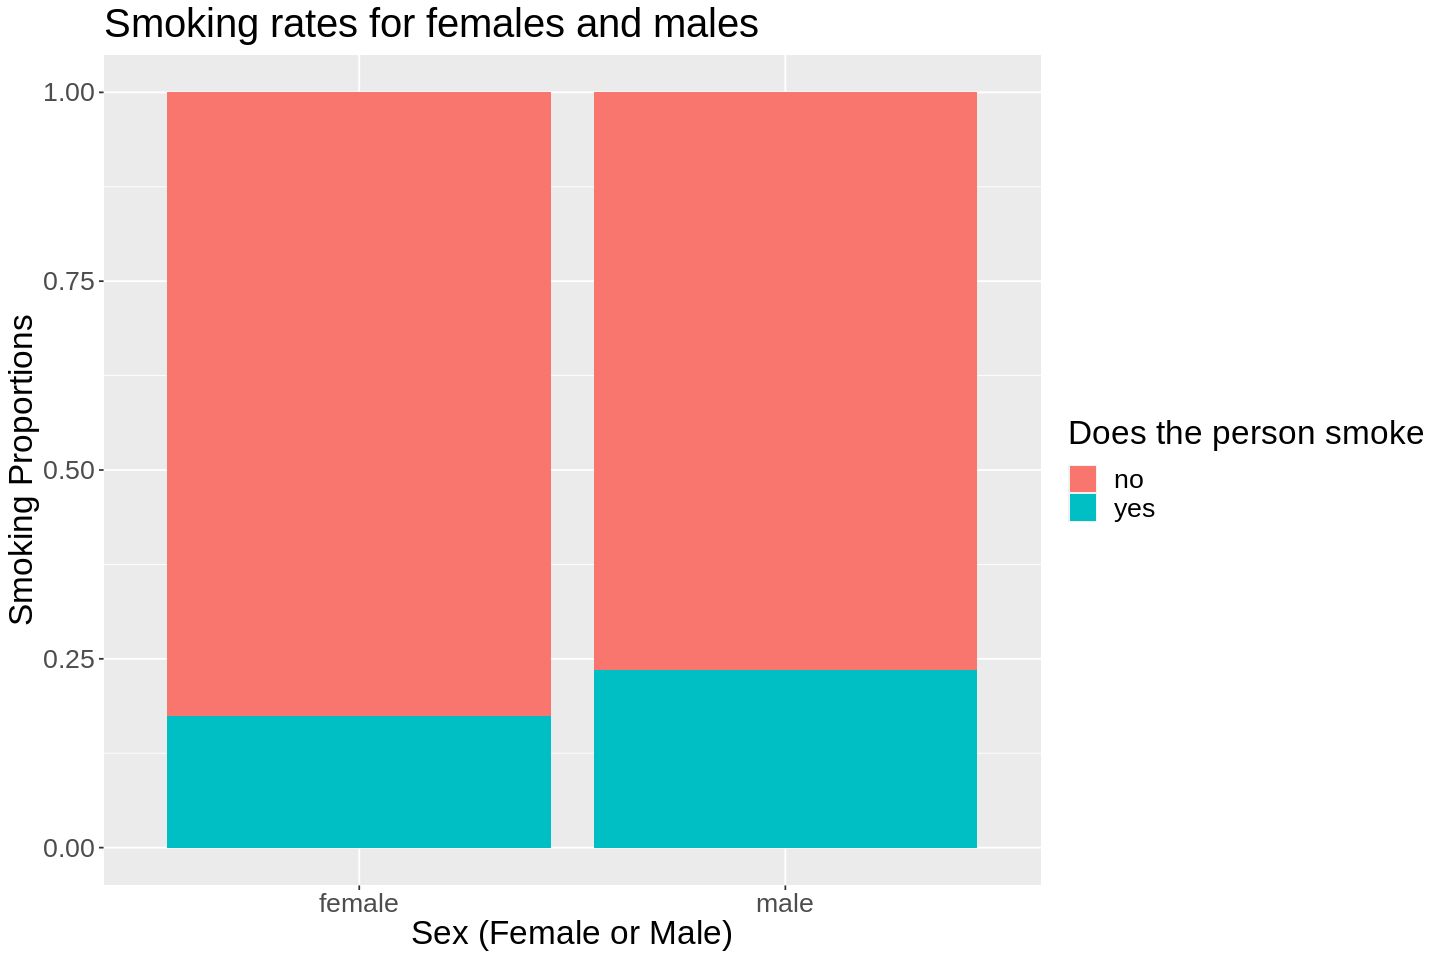

In [20]:
#... <- insurance %>%
#    ggplot(aes(x = ..., fill = ...)) + 
#    ..._...(position = 'fill') + 
#    xlab(...) +
#    ylab(...) +
#    labs(fill = "Does the person smoke") +
#    ggtitle(...)


# your code here
bar_plot <- insurance %>%
   ggplot(aes(x = sex, fill = smoker)) + 
   geom_bar(position = 'fill') + 
   xlab("Sex (Female or Male)") +
   ylab("Smoking Proportions") +
   labs(fill = "Does the person smoke") +
   ggtitle("Smoking rates for females and males")+
   theme(text = element_text(size = 20))
bar_plot

In [21]:
test_1.10()

[1] "Success!"


**Question 1.11**
<br> {points: 1}

Based on the graph, is the proportion of smokers higher amongst men or women?

*Assign your answer to an object called `answer1.11`. Make sure your answer is in lowercase and is surrounded by quotation marks (e.g. `"male"` or `"female"`).*

In [22]:
# Replace the fail() with your answer. 

# your code here
answer1.11 <- "male"

In [23]:
test_1.11()

[1] "Success!"


## 2. Color Palettes (beyond the defaults)
{points: 3}

In the worksheet and this tutorial, you have seen the same colours again and again. These are from the default `ggplot2` color palette. What if you want different colors? We can do this! In R, one of the libraries that provides altenative color palettes is the `RColorBrewer` library. 

For this question:

- Load the `RColorBrewer`library
- Print the list of palettes available for you with the `display.brewer.all()` function
- You can also print out a list of color blind friendly palettes with `display.brewer.all(colorblindFriendly = T)`
- Choose one of the palettes and apply it to the plot whose code is given in the cell below.
    - For the fill aesthetic with categorical variable the function is: `scale_fill_brewer(palette = '...')`
    - For the fill aesthetic with numeric variable the function is: `scale_fill_distiller(palette = '...')`
- Finally, you can also use this [color blindness simulator](https://www.color-blindness.com/coblis-color-blindness-simulator/) to check if your visualizations are color blind friendly

You can look more in depth into the documentation of the `scale_fill_*` functions here: https://ggplot2.tidyverse.org/reference/scale_brewer.html

*Assign your answer to an object called `diamonds_plot`.*

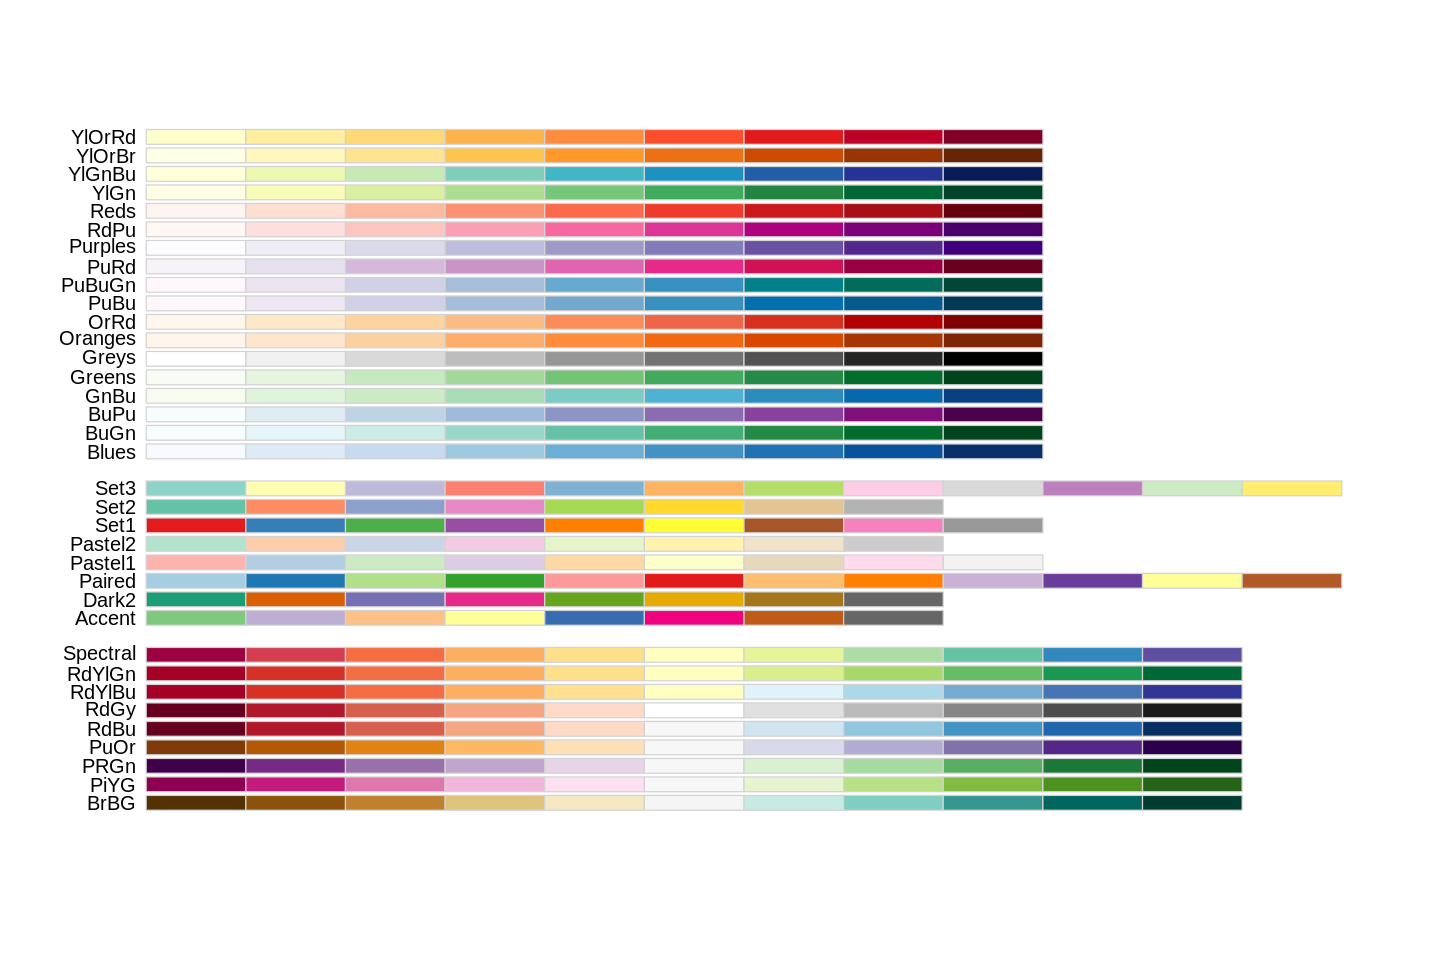

In [24]:
## Run this cell and to explore the RColorBrewer features
library(RColorBrewer)
display.brewer.all()

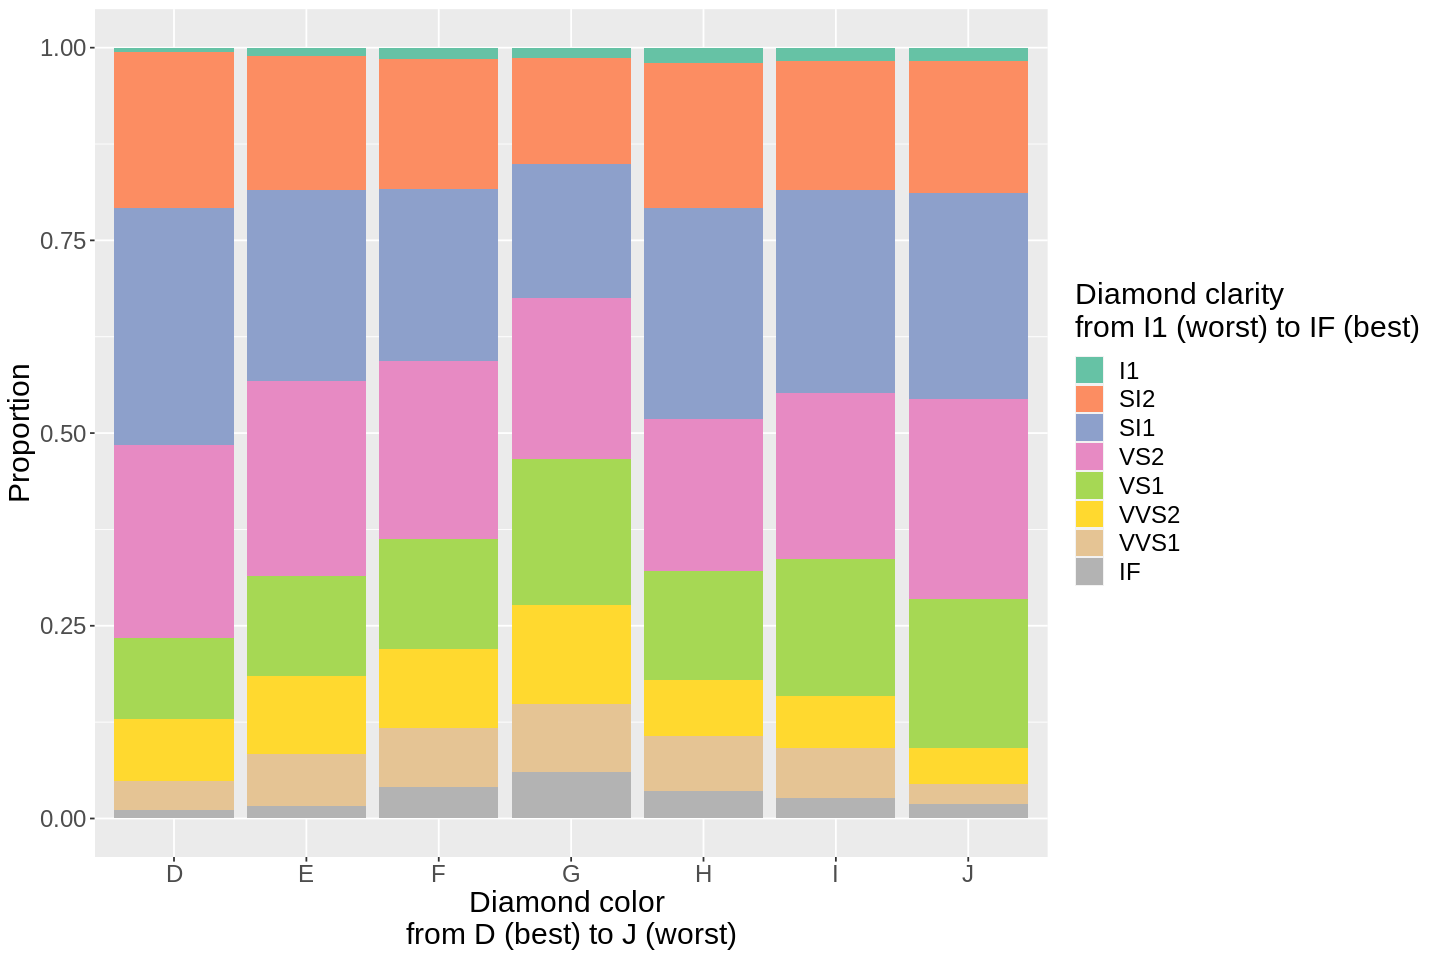

In [25]:
diamonds_plot <- diamonds %>%
    ggplot(aes(x = color, fill = clarity)) + 
    geom_bar(position = 'fill') +
    xlab('Diamond color \nfrom D (best) to J (worst)') +
    ylab('Proportion') +
    labs(fill = "Diamond clarity \nfrom I1 (worst) to IF (best)") 

#Below, insert your colour palette choice via
#... <- diamonds_plot + 
#       ...(palette = ...)


# your code here

diamonds_plot <- diamonds_plot + 
                scale_fill_brewer(palette = "Set2")+
                theme(text = element_text(size = 18))
diamonds_plot

## 3. Fast-Food Chains in the United States (Continued)
<br> {points: 6}

In Worksheet 04, we explored this data set through some visualizations. Now, it is is all up to you. The goal of this assignment is to create **one** plot that can help you figure out which restaurant to open and where! After that you need to write a paragraph explaining your visualization and why you chose it. Also, explain your conclusion from the visualization and reasoning as to how you came to that conclusion. If you need to bring in outside information to help you answer your question, please feel free to do so.  Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.

In answering this question, there is no need to restrict yourself to the west coast of the USA. Consider all states that you have data for. You have a variety of graphs to choose from, but before starting the assignment, discuss with a partner which plot would be the most optimal to answer this question.

<img src="mcdonalds.jpg" width = "300"/>


Hint: The function `pull` from the `dplyr` package selects a column in a data frame and transforms it into a vector. Note: There are different ways you can complete this question so you don't necessarily need to use `pull` (you may find a solution without using it) but it may be helpful.


Parsed with column specification:
cols(
  name = col_character(),
  st = col_character()
)

`summarise()` regrouping output by 'name' (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)



[1] "McDonald's"  "Burger King" "Taco Bell"

[1] "McDonald's"  "Burger King" "Taco Bell"

[1] "McDonald's"  "Burger King" "Taco Bell"

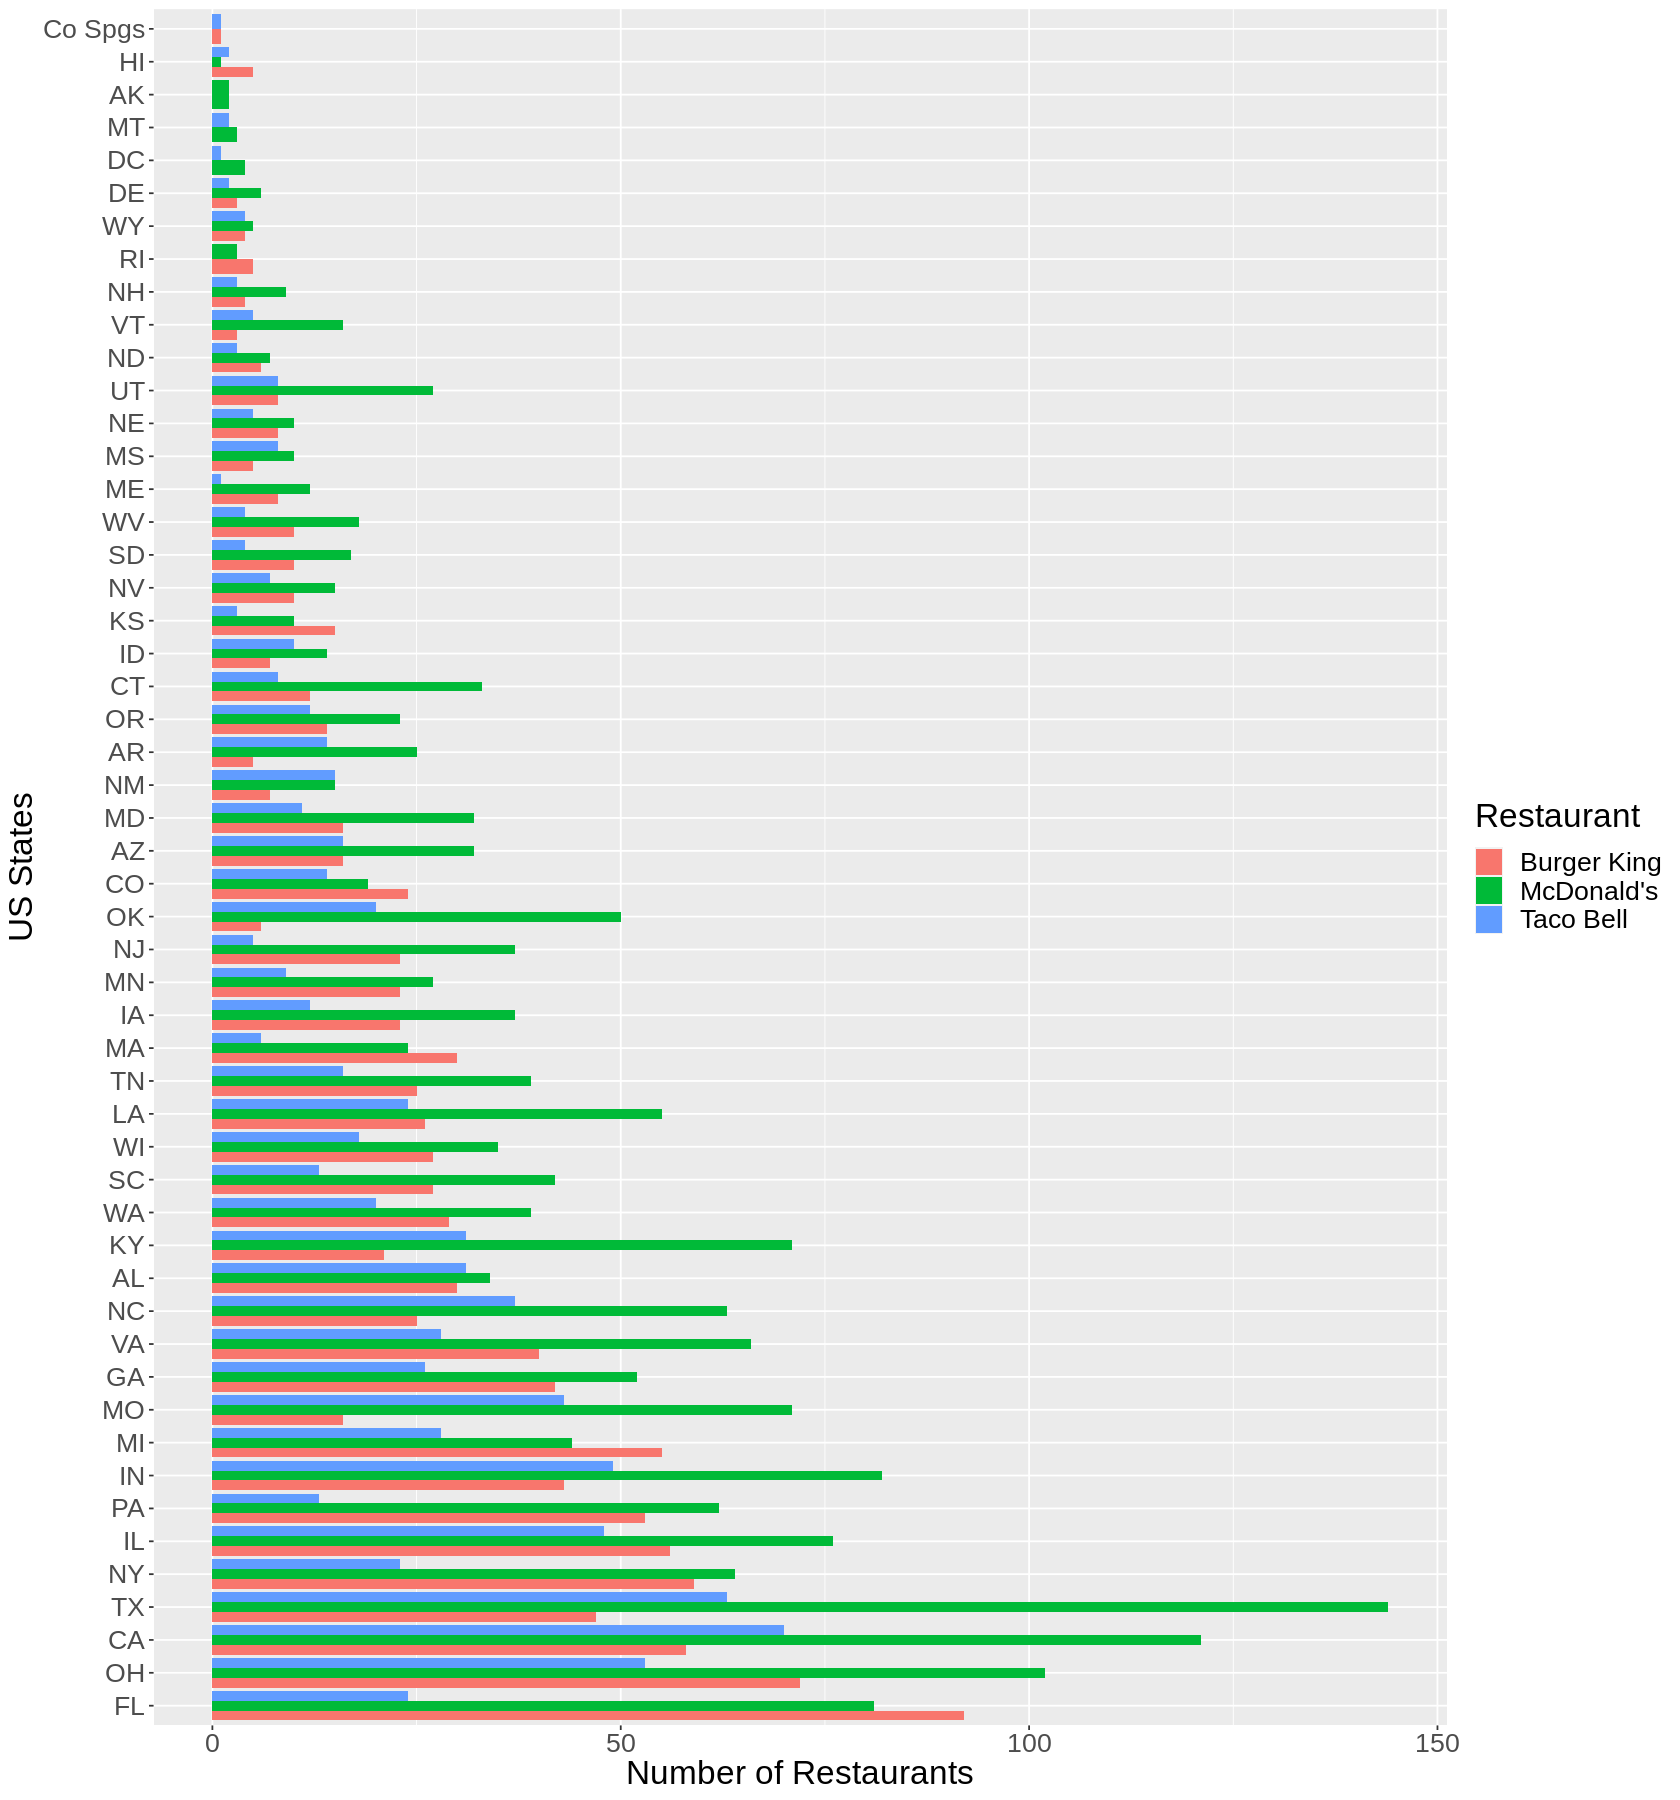

In [26]:
# write the code for your plot here
# your code here
library(dplyr)
# read the dataframe first
fast_food <- read_csv("data/fast_food.csv")
# find the number of restaurants of each chain for each state 
restaurants_per_state <- fast_food %>%
                        group_by(name, st) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
#restaurants_per_state
# fast_food_in_states <- fast_food %>%
#                         group_by(st) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n))
# fast_food_in_states

# restaurants_per_state_plot <- for val in y {
#         filter(restaurants_per_state, name == val)
#     }
top_3_restaurants <- fast_food %>%
                   group_by(name) %>%
                   summarize(n = n()) %>%
                   arrange(desc(n)) %>% 
                   head(n = 3)
#top_3_restaurants
x <- top_3_restaurants$name
x
y <- c(top_3_restaurants$name)
y
z <- pull(top_3_restaurants, name)
z

options(repr.plot.width = 14, repr.plot.height = 15) 
restaurants_per_state_plot <- restaurants_per_state %>%
    filter(name == top_3_restaurants$name[1] || name == top_3_restaurants$name[2] ||
          name == top_3_restaurants$name[3]) %>%
    #semi_join(top_10_restaurants) %>%
    ggplot(aes(x = n, y = fct_reorder(st, n, .desc = TRUE), fill = name)) + 
    geom_bar(stat = "identity", position = "dodge") + 
    xlab("Number of Restaurants") +
    ylab("US States") +
    labs(fill = "Restaurant") +
    theme(text = element_text(size = 20))
    
restaurants_per_state_plot


*Write a paragraph explaining your visualization and why you chose it. Also explain your conclusion from the visualization and reasoning as to how you came to that conclusion. If you need to bring in outside information to help you answer your question, please feel free to do so. Finally, if there is some way that you could improve your visualization, but don't yet know how to do it, please explain what you would do if you knew how.*

My visualization shows the number of resaurants of top 3 chains (by number of restaurants) in the US states, I used the bar plot to represent the number of restaurants in the US for each state and arranged the plot such that we can see the states with lowest number of restaurants with these top 3 chains at the top of the plot. By looking at my plot, I would like to open a Burger King restaurant in DC (Washington DC), because we can see that it has one of lowest number of restaurants in the United States (since it is just a Federal District not a state) and it is the capital city of the US. By doing some research online, we can also see that it is a popular travel destination, it has one of the highest number of both domestic and international tourists visiting with 26 million tourists in 2019. I would like to open up a Burger King restaurant, because we can see that there is no Burger King restaurants in the DC, and our data shows that BK is one of the top 3 chains in the US. If I had the data about the population of US states that I could have used in R, I would have wanted to base my analysis on restaurants per capita via dividing these restaurants numbers by their respective state's population. I think this would have been a good idea, and could have resulted in better analysis. If I knew how to do it, another great way to improve my findings and visualization would be having more space between each of the states on the x-axis, so that we can see the number of restaurants for each state more clearly.     

In [27]:
source("cleanup_tutorial_04.R")